In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
#Identify missing value

In [3]:
df = pd.read_excel('dataset.xlsx', sheet_name='missing')

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      31 non-null     int64  
 1   Sex     29 non-null     object 
 2   Height  28 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 872.0+ bytes


ID        0
Sex       2
Height    3
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Height'>

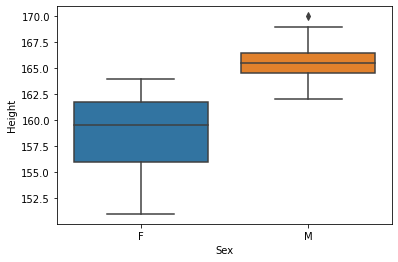

In [5]:
sns.boxplot(x='Sex',y='Height',data=df)

In [6]:
# Filling with mean

In [7]:
df2 = df.copy()

In [8]:
df2['Height'].mean()

161.85714285714286

In [9]:
# เติมค่าใน missing value โดยใช้ mean=161.8571428571429 เติมแทนที่ว่าง
df2['Height']=df2['Height'].fillna(df2['Height'].mean())

In [10]:
df2.isnull().sum()

ID        0
Sex       2
Height    0
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Height'>

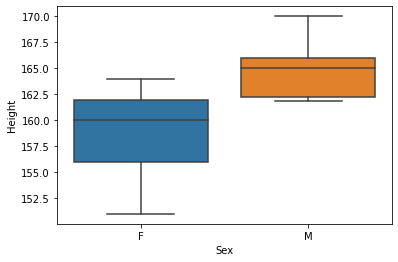

In [11]:
sns.boxplot(x='Sex',y='Height',data=df2)

In [12]:
# Filling with mean in each separate group

In [13]:
df3 = df.copy()

In [14]:
M = df.loc[df['Sex']=='M']
F = df.loc[df['Sex']=='F']
avg_M = np.average(M['Height'].dropna())
avg_F = np.average(F['Height'].dropna())

In [15]:
def replace_height(x):
    sex = x[0]
    h = x[1]
    if pd.isnull(h):
        if sex == 'M':
            return avg_M
        elif sex == 'F':
            return avg_F
    else:
        return h

In [16]:
df3['Height'] = df3[['Sex','Height']].apply(replace_height,axis=1)

In [17]:
df3

,ID,Sex,Height
0,1001,F,162.000000
1,1002,M,162.000000
2,1003,F,163.000000
3,1004,M,165.000000
4,1005,M,165.583333
5,1006,M,165.000000
6,1007,M,169.000000
7,1008,F,155.000000
8,1009,M,163.000000
9,1010,M,166.000000


In [18]:
# Imputation with scikid learn

In [19]:
df4 = df.copy()
df4.drop('Sex',axis=1,inplace=True)

# df4.dropna(axis=0) --> drop row

In [20]:
from sklearn.impute import SimpleImputer
# strategy = 'median','mode','mean'
my_imputer = SimpleImputer(strategy = 'median')

impute_data = my_imputer.fit_transform(df4)
df4 = pd.DataFrame(impute_data,columns=['ID','Height'])

In [21]:
df4

,ID,Height
0,1001.0,162.0
1,1002.0,162.0
2,1003.0,163.0
3,1004.0,165.0
4,1005.0,162.0
5,1006.0,165.0
6,1007.0,169.0
7,1008.0,155.0
8,1009.0,163.0
9,1010.0,166.0


In [22]:
# Imputation with an additional column

In [23]:
#mark

In [24]:
df5 = df.copy()

In [25]:
df5['mark'] = df5['Height'].isnull()

In [26]:
df5

,ID,Sex,Height,mark
0,1001,F,162.0,False
1,1002,M,162.0,False
2,1003,F,163.0,False
3,1004,M,165.0,False
4,1005,M,NaN,True
5,1006,M,165.0,False
6,1007,M,169.0,False
7,1008,F,155.0,False
8,1009,M,163.0,False
9,1010,M,166.0,False


In [27]:
# Delete

In [28]:
# drop column NA
df5 = df5.dropna(axis=1)

In [29]:
df5

,ID,mark
0,1001,False
1,1002,False
2,1003,False
3,1004,False
4,1005,True
5,1006,False
6,1007,False
7,1008,False
8,1009,False
9,1010,False
